## Dataset Formatter

In this notebook the dataset is organized in training and test sets. However we have to be clear about how the dataset is to be used when training by using hugging face.

The complete dataset contains 431698 samples with 12 characteristics that include the corresponding labels in one hot encoding.

The dataset will be organized as follows:

$\mathcal{X}_{train}\in \mathcal{R}^{341698 \times 12 } $

$\mathcal{X}_{test}\in \mathcal{R}^{90000 \times 12 } $


In [44]:
import pandas as pd
import numpy as np
import os
dir_root = os.getcwd()
dir_root


'/home/falconiel/CodePrograms/clasificaion_robos_fge'

In [45]:
dataset_total = pd.read_csv(os.path.join(dir_root, 'data/raw/dataset.csv'), converters={'NDD':str})
dataset_total.sample(5)

,NDD,RELATO,cantidad_palabras,Tipo_Delito_PJ,TARGET,LABELS_ROBO A DOMICILIO,LABELS_ROBO A PERSONAS,LABELS_ROBO A UNIDADES ECONOMICAS,"LABELS_ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEHICULOS",LABELS_ROBO DE CARROS,LABELS_ROBO DE MOTOS,LABELS
234401,120101820080042,señor fiscal debo manifestar que el día de hoy...,136,ROBO,3,0,0,0,0,0,1,ROBO DE MOTOS
203733,090801819050043,es el caso señor fiscal que el día ayer 15 de ...,140,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
28497,060101814040151,es el caso señor fiscal que el día de hoy juev...,164,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
194446,090701814120060,se adjunta parte de aprehension de flagrancia ...,63,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
198433,090701818050412,es el caso señor fiscal hoy 18 de mayo del 201...,147,ROBO,5,1,0,0,0,0,0,ROBO A DOMICILIO


Some preprocessing

In [46]:
dataset_total.RELATO = dataset_total.RELATO.str.strip()
dataset_total.RELATO = dataset_total.RELATO.str.lower()
dataset_total.RELATO = dataset_total.RELATO.str.replace("[^A-Za-z0-9áéíóúÁÉÍÓÚñÑ]+", " ", regex=True)

In [47]:
from utils import camel_case_string_noPoint
new_names = []
for col in dataset_total.columns:
    new_names.append(camel_case_string_noPoint(col))
new_names

['ndd',
 'relato',
 'cantidadPalabras',
 'tipoDelitoPj',
 'target',
 'labelsRoboADomicilio',
 'labelsRoboAPersonas',
 'labelsRoboAUnidadesEconomicas',
 'labelsRoboDeBienes,AccesoriosYAutopartesDeVehiculos',
 'labelsRoboDeCarros',
 'labelsRoboDeMotos',
 'labels']

In [48]:
dataset_total.columns = new_names
dataset_total.sample(5)

,ndd,relato,cantidadPalabras,tipoDelitoPj,target,labelsRoboADomicilio,labelsRoboAPersonas,labelsRoboAUnidadesEconomicas,"labelsRoboDeBienes,AccesoriosYAutopartesDeVehiculos",labelsRoboDeCarros,labelsRoboDeMotos,labels
222360,092701820010007,es el caso señor fiscal que el día lunes 06 de...,133,ROBO,3,0,0,0,0,0,1,ROBO DE MOTOS
329878,170101817042499,señor fiscal remito el parte policial no pjudm...,37,ROBO,5,1,0,0,0,0,0,ROBO A DOMICILIO
347513,170101818081757,es el caso señor fiscal que el día miércoles 0...,124,ROBO,5,1,0,0,0,0,0,ROBO A DOMICILIO
81829,090101814114396,es el caso señor fiscal que el día 24 de novie...,110,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
338681,170101817121319,es el caso señor fiscal que el día 07 de dicie...,89,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS


Applying shuffle to the dataset in order to randomly order the samples in the data

In [49]:
from sklearn.utils import shuffle
dataset_total_shuffle = shuffle(dataset_total, random_state=42)
dataset_total_shuffle.reset_index(inplace=True)
dataset_total.shape, dataset_total_shuffle.shape

((431669, 12), (431669, 13))

In [50]:
TEST_SIZE = 90000
TRAIN_SIZE = dataset_total.shape[0] - TEST_SIZE
train_df = dataset_total_shuffle.iloc[0:TRAIN_SIZE, :]
test_df = dataset_total_shuffle.iloc[TRAIN_SIZE:, :]
# training_sentences = sentences[0:training_size]
# testing_sentences = sentences[training_size:]
# training_labels = labels[0:training_size]
# testing_labels = labels[training_size:]

In [51]:
train_df.tail()

,index,ndd,relato,cantidadPalabras,tipoDelitoPj,target,labelsRoboADomicilio,labelsRoboAPersonas,labelsRoboAUnidadesEconomicas,"labelsRoboDeBienes,AccesoriosYAutopartesDeVehiculos",labelsRoboDeCarros,labelsRoboDeMotos,labels
341664,359676,170101819072824,es el caso señor fiscal que el día y la hora i...,127,ROBO,3,0,0,0,0,0,1,ROBO DE MOTOS
341665,239510,120501816060052,es el caso señor fiscal que yo trabajo en la e...,195,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
341666,423404,230201819030035,es el caso señor fiscal yo trabajo en creditos...,116,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
341667,22529,040501814090008,es el caso señor fiscal que el dia jueves cuat...,73,ROBO,4,0,0,0,1,0,0,"ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEH..."
341668,27755,050501817050028,mediante parte policial se hace conocer que co...,73,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS


In [52]:
test_df.head()

,index,ndd,relato,cantidadPalabras,tipoDelitoPj,target,labelsRoboADomicilio,labelsRoboAPersonas,labelsRoboAUnidadesEconomicas,"labelsRoboDeBienes,AccesoriosYAutopartesDeVehiculos",labelsRoboDeCarros,labelsRoboDeMotos,labels
341669,363568,170101819104159,el día de ayer 28 de octubre del 2019 a las 21...,186,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
341670,172755,090101821030695,es el caso señor fiscal que el día 04 de marzo...,105,ROBO,2,0,0,0,0,1,0,ROBO DE CARROS
341671,414181,220101819100206,es señor fiscal que el dia sabado 26 de octubr...,73,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
341672,142490,090101818110001,es el caso señor fiscal que el día de hoy 31 d...,111,ROBO,3,0,0,0,0,0,1,ROBO DE MOTOS
341673,72041,090101814031763,es el caso señor fiscal el dia 11 de marzo del...,43,ROBO,3,0,0,0,0,0,1,ROBO DE MOTOS


In [53]:
train_df.shape, test_df.shape

((341669, 13), (90000, 13))

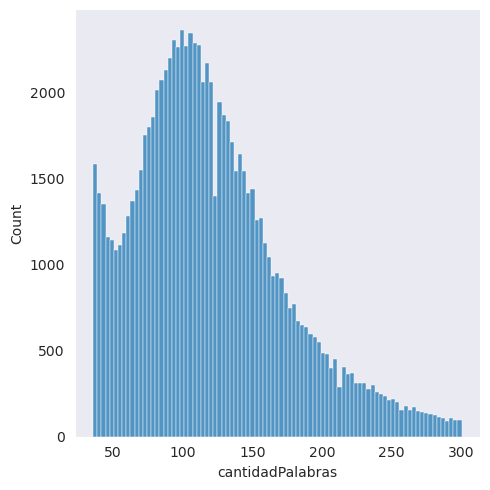

In [54]:
import seaborn as sns
sns.set_style('dark')
sns.displot(test_df.cantidadPalabras)

/home/falconiel/anaconda3/envs/fge_dir/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cantidadPalabras', ylabel='Density'>

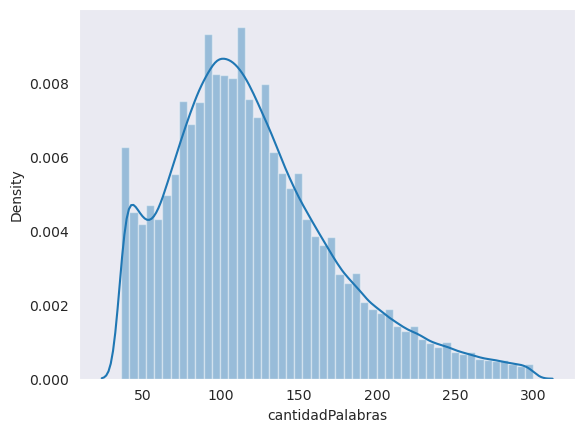

In [55]:
sns.distplot(train_df.cantidadPalabras)

## Generating Validation dataset
Checking some of the bibliography in HuggingFaces, there is a procedure to create the validation dataset from testing set. However, I have also made that from the training set using train test split of sklearn. Let us explore which is the best way to obtain that. In either case, saving the datset should be final because shuffle of the data can be applied. In videos, validation dataset has been obtained from the trainig set, reducing a bit its size. Consider that the operation to split the dataset can be from the dataset dict object that can be created using hugging faces: https://discuss.huggingface.co/t/how-to-split-main-dataset-into-train-dev-test-as-datasetdict/1090


In [56]:
train_df.shape, test_df.shape

((341669, 13), (90000, 13))

I think since there were some initial problems in memory when applying tokenize to train dataset, it could be ok to lower a bit its size by extracting validation set out of it

In [57]:
TRAIN_SIZE, TEST_SIZE, 0.8*TRAIN_SIZE, 0.2*TRAIN_SIZE, TEST_SIZE/(TRAIN_SIZE+TEST_SIZE)*100

(341669, 90000, 273335.2, 68333.8, 20.849308150457873)

We could also get 50% of testing cases for validation considering what they recommend in https://discuss.huggingface.co/t/how-to-split-main-dataset-into-train-dev-test-as-datasetdict/1090. However this would lower testing samples to 45000, validation samples to 45000 and training samples would remain at 341669. 

In [58]:
VALID_SIZE = int(0.2*TRAIN_SIZE)
TRAIN_SIZE -= VALID_SIZE
TRAIN_SIZE, VALID_SIZE

(273336, 68333)

In [59]:
train_df_out = train_df.iloc[0:TRAIN_SIZE, :]
valid_df = train_df.iloc[TRAIN_SIZE:, :]

In [60]:
train_df_out.tail()

,index,ndd,relato,cantidadPalabras,tipoDelitoPj,target,labelsRoboADomicilio,labelsRoboAPersonas,labelsRoboAUnidadesEconomicas,"labelsRoboDeBienes,AccesoriosYAutopartesDeVehiculos",labelsRoboDeCarros,labelsRoboDeMotos,labels
273331,151271,090101819061538,es el caso señor fiscal que el día de hoy 08 d...,119,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
273332,324852,170101816114353,es el caso señor fiscal que en el lugar fecha ...,73,ROBO,4,0,0,0,1,0,0,"ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEH..."
273333,91906,090101815064403,es el caso señor fiscal que el domingo 14 de j...,129,ROBO,3,0,0,0,0,0,1,ROBO DE MOTOS
273334,406862,210101815110084,es el caso señor fiscal que el dia viernes 06 ...,108,ROBO,5,1,0,0,0,0,0,ROBO A DOMICILIO
273335,322342,170101816092764,es el caso señor fiscal miestras me ecnontraba...,41,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS


In [61]:
valid_df.head()

,index,ndd,relato,cantidadPalabras,tipoDelitoPj,target,labelsRoboADomicilio,labelsRoboAPersonas,labelsRoboAUnidadesEconomicas,"labelsRoboDeBienes,AccesoriosYAutopartesDeVehiculos",labelsRoboDeCarros,labelsRoboDeMotos,labels
273336,219522,092101816100021,el dia jueves 06 de octubre del 2016 aprox a l...,159,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
273337,41328,070101817110139,yo john pablo cárdenas aguilar de c c 07032738...,121,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
273338,235408,120101821110105,es el caso señor fiscal que el dia de ayer mar...,201,ROBO,3,0,0,0,0,0,1,ROBO DE MOTOS
273339,117523,090101817013086,es el caso señor fiscal que el dia 13 de enero...,107,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
273340,95901,090101815091935,es el caso señor fiscal que el dia de ayer 8 d...,121,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS


In [63]:
train_df_out.shape, test_df.shape, valid_df.shape

((273336, 13), (90000, 13), (68333, 13))

In [62]:
train_df_out.to_csv(os.path.join(dir_root,'data/interim/trainset.csv'), index=False)
test_df.to_csv(os.path.join(dir_root,'data/interim/testset.csv'), index=False)
valid_df.to_csv(os.path.join(dir_root,'data/interim/validset.csv'), index=False)

In [64]:
train_df_huggingface = train_df_out[['relato', 'labels']]
test_df_huggingface = test_df[['relato', 'labels']]
valid_df_huggingface = valid_df[['relato', 'labels']]

In [65]:
valid_df_huggingface.sample(3)

,relato,labels
302386,es el caso señor fiscal que en el dia y la hor...,"ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEH..."
322542,es el caso señor fiscal que el día 14 de dicie...,ROBO A PERSONAS
325567,señora fiscal cuando deje mi vehículo estacion...,"ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEH..."


In [66]:
train_df_huggingface.to_csv(os.path.join(dir_root,'data/interim/trainsethugf.csv'), index=False)
test_df_huggingface.to_csv(os.path.join(dir_root,'data/interim/testsethugf.csv'), index=False)
valid_df_huggingface.to_csv(os.path.join(dir_root,'data/interim/validsethugf.csv'), index=False)